In [1]:
import requests
from bs4 import BeautifulSoup
from lxml import etree


In [ ]:
for year in ['2017', '2018', '2019']:
    outer_url = 'https://www.nbascoutinglive.com/ + ' + year + '-scouting-reports/'

    soup = BeautifulSoup(r, 'lxml')


In [10]:
url = 'https://www.nbascoutinglive.com/2018-scouting-reports/'
r = requests.get(url).text
soup = BeautifulSoup(r, 'lxml')

In [11]:
outer_html = soup.find_all('div',{'class': 'elementor-text-editor elementor-clearfix'})


In [12]:
outer_html[2].find_all('a')

[<a href="http://nbascoutinglive.com/liangelo-ball-scouting-report">LiAngelo Ball</a>,
 <a href="http://nbascoutinglive.com/billy-preston-scouting-report">Billy Preston</a>,
 <a href="http://nbascoutinglive.com/mitchell-robinson-scouting-report">Mitchell Robinson</a>,
 <a href="http://nbascoutinglive.com/anfernee-simons-scouting-report">Anfernee Simons</a>]

In [13]:
links = []
for i in range(3):
    for j in outer_html[i]:
        links.append(j.find_all('a'))

In [21]:
len(links[0])

0

In [14]:
for link in links:
    if len(link) == 0:
        links.remove(link)

In [99]:
#links[1][0] = links[1][0]['href']
#links

In [15]:
link2 = []
for link in links:
    link2.append(link[0]['href'])

In [188]:
import time
word_list = []
for link in link2:
    parse_every_player(link, word_list)
    time.sleep(0.5)

IndexError: list index out of range

In [187]:

def parse_every_player(link, word_list):
    r2 = requests.get(link).text
    soup2 = BeautifulSoup(r2,'lxml')

    for i in soup2.find_all('div',{'class': 'elementor-text-editor elementor-clearfix'})[2].find_all('p'):
        #print(i)
        if '<a' not in str(i):
            word_list.append(i.text)

    word_list = word_list[:-1]


In [191]:

r2 = requests.get('https://www.nbascoutinglive.com/rawle-alkins-scouting-report/').text
soup2 = BeautifulSoup(r2,'lxml')



In [196]:
word = []
for i in soup2.find_all('div',{'class': 'elementor-text-editor elementor-clearfix'})[2].find_all('p'):
    #print(i)
    if '<a' not in str(i):
        word.append(i.text)

word = word[:-1]

In [8]:
from selenium import webdriver
import time

In [16]:
browser = webdriver.Chrome()
get_html = 'test.html'


for link in link2:
    f = open(get_html, 'ab')
    browser.get(link)
    f.write(browser.page_source.encode('utf-8','ignore'))
    f.close()
browser.close()

In [2]:
#html = open(,'r',encoding='utf-8')

In [3]:
#htmlhandler = html.read()

In [2]:
html = etree.parse('test.html', etree.HTMLParser())
#result = etree.tostring(html)

In [22]:
#html.xpath('//div[@class="elementor-text-editor elementor-clearfix"]//p/text()')

In [3]:
wordbag = html.xpath('//h5/ancestor::div[@class="elementor-text-editor elementor-clearfix"]//p/text()')

In [4]:
import re
pattern = re.compile('[^a-zA-Z]')
for i in wordbag:
    i = re.sub(pattern, ' ',i)

In [5]:
word_str = ' '.join(wordbag)

In [6]:
word_2_str

NameError: name 'word_2_str' is not defined

In [7]:
word_2_str = re.sub(pattern, ' ', word_str)

In [8]:
from nltk.corpus import stopwords 
#remove stopwords
word_2_str = word_2_str.lower()
words = word_2_str.split(' ')
words = [w for w in words if not w in set(stopwords.words('english'))]

In [27]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [9]:
for i in words:
    if len(i) == 0:
        words.remove(i)

In [41]:
#words

In [10]:
word_str = ' '.join(words)

In [11]:
word_str

'height weight college arizona classification senior birthdate top prospect rank projected draft range nd round undrafted nba draft good scorer dribble decent shooter catch excels scoring move decent playmaker good defensive player solid athlete good intangibles streaky shooter careless offense lead turnovers needs improve rebounding occasional lapses defensively true point guard undersized play two overshadowed higher profile teammates old draft prospect may limited upside kadeem allen athletic skilled combo guard score basketball uncertain effectively run point next level skills translate league solid senior season likely end nba summer league roster links games scouted height weight college arizona classification sophomore birthdate projected draft range nd round undrafted active finisher around basket adequate low post scorer excels scoring move good free throw shooter big man good hands good size play inside solid athlete rock solid motor shoot ball enough miss shots wildly around

In [13]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

#words = word_tokenize(word_str)

#for word in words:
#    print(word + ":" + ps.stem(word))

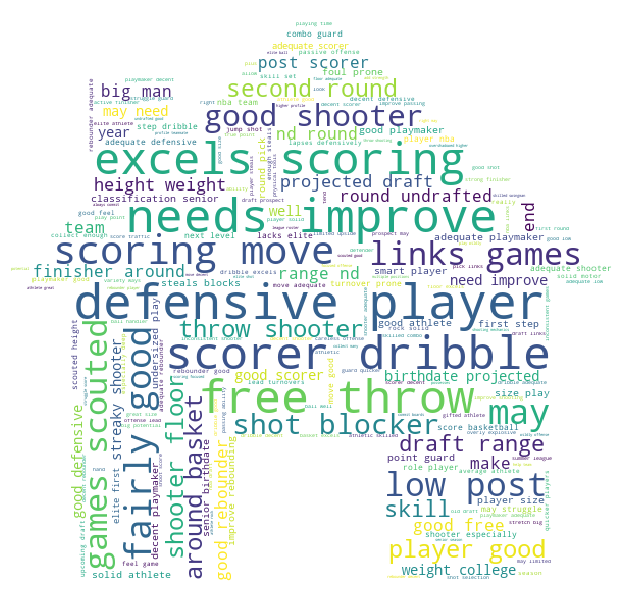

In [12]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline


#words = 'access guest guest apartment area area bathroom bed bed bed bed bed bedroom block coffee coffee coffee coffee entrance entry francisco free garden guest home house kettle kettle kitchen kitchen kitchen kitchen kitchen kitchenliving located microwave neighborhood new park parking place privacy private queen room san separate seperate shared space space space street suite time welcome'
#f = open('scout1.json','r',encoding='utf-8')

mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    #plt.savefig('scout_wordcloud.png')
#Run the following to generate your wordcloud
generate_wordcloud(word_str, mask)
